# PYTHON PLOTTING WITH MATHPLOTLIB

In [2]:
## Import Matplotlib and Numpy

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(444)

matplotlib.figure.Figure

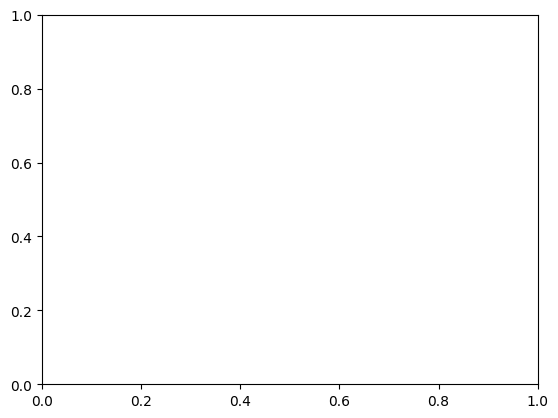

In [3]:
## Object-type interface

fig, _ = plt.subplots()
type(fig)

## Statefull vs. Stateless

- Statefull: Implizit access to objects
- Stateless: Explizit access to objects (objects are mutable) -> Starting Point: Axes

## Stacked Area Chart

... three times series

(1950.0, 1999.0)

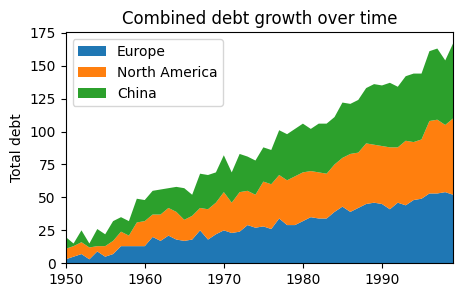

In [7]:
# creating three random time series
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Europe', 'North America', 'China'])

ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])


## Stacked column diagramm

Text(0.5, 1.0, 'Frequencies of $y$')

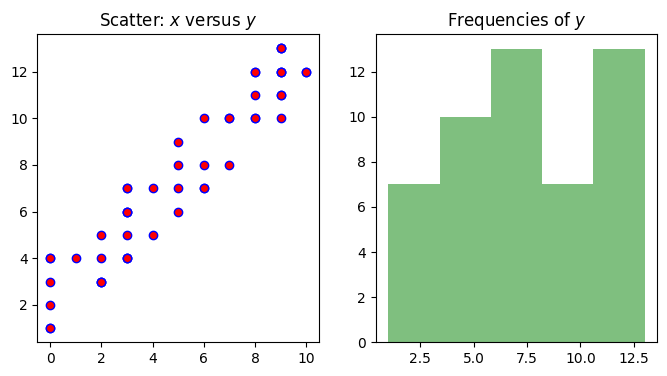

In [12]:
# Tasks: (1) 50 random numbers between 0 and 10
x = np.random.randint(0,11, size=50)
y = x + np.random.randint(1,5, size=x.size)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# cuz we deal with ax1, ax2 individually a stateless approach is better

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')

ax2.hist(x=y, bins=5, color='g', alpha=0.5)
ax2.set_title('Frequencies of $y$')

## Heatmap

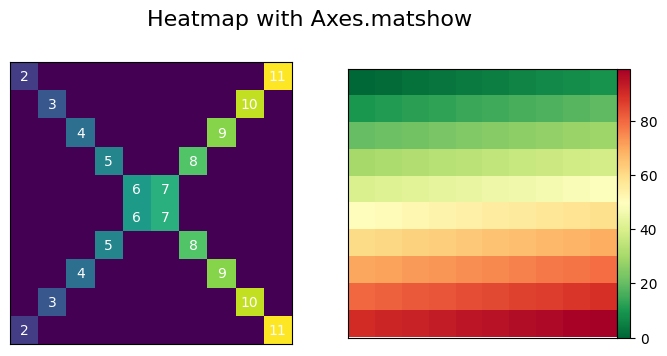

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import numpy as np

np.random.seed(444)

def main():
    x = np.diag(np.arange(2,12))[::-1]
    x[np.diag_indices_from(x[::-1])] = np.arange(2,12)
    x2 = np.arange(x.size).reshape(x.shape)

    sides = {'left', 'right', 'top', 'bottom'}
    nolabels = {s: False for s in sides}
    nolabels.update({'label%s' % s: False for s in sides})

    with plt.rc_context(rc={'axes.grid': False}):
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
        ax1.matshow(x)
        img2 = ax2.matshow(x2, cmap='RdYlGn_r')

        for ax in (ax1, ax2):
            ax.tick_params(axis='both', which='both', **nolabels)
        for i,j in zip(*x.nonzero()):
            ax1.text(j, i, x[i,j], color='white', ha='center', va='center')
        
        divider = make_axes_locatable(ax2)
        cax = divider.append_axes('right', size='5%', pad=0)
        plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
        fig.suptitle('Heatmap with Axes.matshow', fontsize=16)

if __name__ == '__main__':
    main()